# Ising Spins : Berlemont Kevin

We consider $i=1 \cdots N$ spins taking values $S_i = \pm 1$, on a two dimensional grid of size $L \times L$ with $N = L^2$. We use periodic boundary conditions. The Hamiltonian reads :
$$\mathcal{H} = - \sum_{ij} S_i S_j  $$


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
def square_neighbors(L):
    N = L * L
    site_dic = {} # dictionnaries is nice for neighbors
    x_y_dic = {}
    for j in range(N):
        row = j // L #modulus
        column = j - row * L # indices of the column
        site_dic[(row, column)] = j
        x_y_dic[j] = (row, column)
        neighbors = []
    for j in range(N):
        row, column = x_y_dic[j]
        right_neighbors = site_dic[row, (column + 1) % L]
        up_neighbors = site_dic[(row + 1) % L, column]
        left_neighbors = site_dic[row, (column - 1 + L) % L]
        down_neighbors = site_dic[(row - 1 + L) % L, column]
        neighbors.append((right_neighbors, up_neighbors, left_neighbors, down_neighbors))
    neighbors = tuple(neighbors) # increase speed and localize the variables, just lecture
    return neighbors, site_dic, x_y_dic

If we want to check that our program is working, we can plot an example of the configuration : 

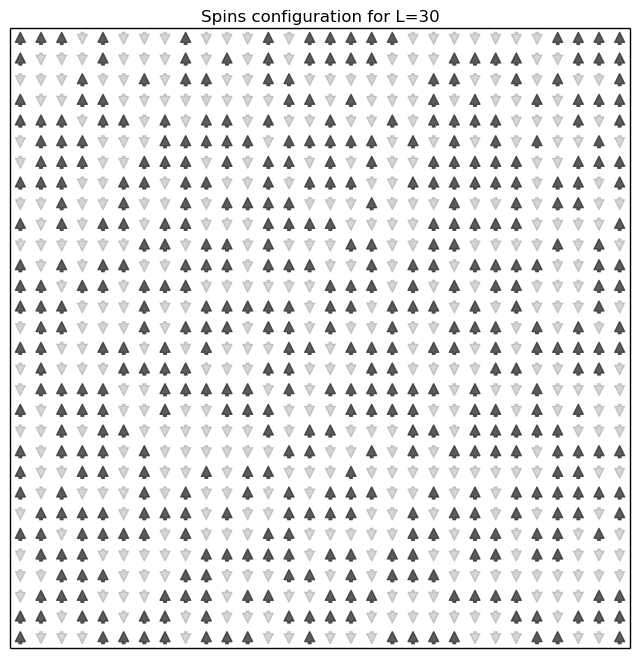

In [6]:
import matplotlib.pyplot as plt
import random as rdm
% matplotlib inline
import pylab 
from matplotlib.patches import FancyArrowPatch


# -------------------
#Graphical function
#---------------------
def plot_spin(c,L):
    plt.figure(figsize=(8, 8), dpi=80) 
    s = 1.0 / L
    for i in range(L):
        for j in range(L):
            x, y, dy = (i + 0.5) * s, (j + 0.5) * s, 0.85 * s * c[i][j]
            arrow = FancyArrowPatch((x, y - 0.5 * dy), (x, y + 0.5 * dy),
                    color='.2', lw=1, alpha=(.5+c[i][j]*0.3), arrowstyle="Simple" +
                    ", head_length=" + str(2 * 150 * s) +
                    ", head_width=" + str(2* 150 * s) +
                    ", tail_width=" + str(2 * 40 * s))
            pylab.gca().add_patch(arrow)
    pylab.axis('scaled')
    pylab.axis([0, 1, 0, 1])
    pylab.gca().set_xticks([])
    pylab.gca().set_yticks([])
    
#-----------------------------------------------    
#Example of values
L=30
N=L*L
neighbors, site_dic, x_y_dic = square_neighbors(L)
S = [rdm.choice([-1, 1]) for k in range(N)]
    
plot_spin([[S[site_dic[(a, b)]] for a in range(L)] for b in range(L)],L)
plt.title('Spins configuration for L=%i'%L)
plt.show()
#-----------------------


We will now program some function in order to initialize correctly the system, with the lattice and the initial conditions and some functions to plot an animations of the spins evolution. 

In [8]:
%pylab inline

from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=2, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)


from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

from matplotlib import animation



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
def init_square_random(L,value_beta):
    global neighbors, site_dic, x_y_dic,beta,s,N,arrows
    N=L*L
    beta = value_beta
    neighbors, site_dic, x_y_dic = square_neighbors(L)
    S = [rdm.choice([-1, 1]) for k in range(N)]
    s = 1.0 / L # for the animation
    arrows = []
    #graphical initialization
    
    
    return S
from matplotlib.collections import PatchCollection
# Intialization of the animation
def init_anim():
    global ax
    for p in arrows:
        ax.add_patch(p)
    title.set_text('')
    energy_text.set_text('')
    mag_text.set_text('')
    return arrows,title,energy_text,mag_text

import numpy as np
from numpy.random import rand


def energy(S, N, neighbors): #energy of configuration
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in neighbors[k]) # cna improve with the use of neighbors because only the change affect the nergy
    return 0.5 * E

# magnetization of  the configuration
def Mag(S):
    global N
    M = np.sum(S)
    return M


# animation function.  This is called sequentially
def animate(l):
    global S,beta,arrows,N,neighbors
    S,E,M = metropolis(S,1,beta)
    
    #arrows=[]
    title.set_text('')
    time=l*N
    Energy=energy(S,N,neighbors)
    magne=Mag(S)
    title.set_text('Time = %i' %time)
    energy_text.set_text('Energy = %.2f'%Energy)
    mag_text.set_text('Magnetization = %1.f'%magne)
    for i in range(L):
        for j in range(L):
            x, y, dy = (i + 0.5) * s, (j + 0.5) * s, 0.85 * s * S[site_dic[(i, j)]]
            arrows[i*L+j].set_positions((x, y - 0.5 * dy), (x, y + 0.5 * dy)) 
            arrows[i*L+j].set_alpha(.5+S[site_dic[(i, j)]]*0.3)
            arrows.append(arrow)
    #p = PatchCollection(arrows,match_original=True)
    return arrows,title,energy_text,mag_text





def metropolis(S,itera,beta):
  E=[] ; M=[] ; Energy = energy(S,N,neighbors);
  for i_sweep in range(itera):
    for iter in range(N):
        k = rdm.randint(0,N-1)
        h = sum(S[neighbors[k][j]] for j in range(4))
        Delta_E=2.*h*S[k]
        Upsilon=np.exp(-beta*Delta_E)
        if rand() < Upsilon: 
            Energy = Energy + Delta_E
            S[k] = -S[k]
    E.append(Energy)
    M.append(Mag(S))
  return S,E,M



In [10]:
#---------------------------------------------------------
#---------------------------------------------------------
#Now the simulations
#---------------------------------------------------------
#---------------------------------------------------------

S=init_square_random(32,1.0)
#Initialisation Graphic
#Beta = 0.5 , T < T_c
#---------------------------------------------
fig = plt.figure(figsize=(7, 7), dpi=80)

pylab.gca().set_xticks([])
pylab.gca().set_yticks([])
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(0, 1), ylim=(0, 1))
title = ax.text(0.02, 1.07, '', transform=ax.transAxes)
energy_text = ax.text(0.3, 1.07, '', transform=ax.transAxes)
mag_text = ax.text(0.7, 1.07, '', transform=ax.transAxes)
plt.title(r'Spins configuration for L=%i, $\beta$=%.3f'%(L,beta))
for i in range(L):
        for j in range(L):
            x, y, dy = (i + 0.5) * s, (j + 0.5) * s, 0.85 * s * S[site_dic[(i, j)]]
            arrow = FancyArrowPatch((x, y - 0.5 * dy), (x, y + 0.5 * dy),
                    color='.2', lw=1, alpha=(.5+S[site_dic[(i, j)]]*0.3), arrowstyle="Simple" +
                    ", head_length=" + str(2 * 150 * s) +
                    ", head_width=" + str(2* 150 * s) +
                    ", tail_width=" + str(2 * 40 * s))
            arrows.append(arrow)
p = PatchCollection(arrows,match_original=True)
for fleche in arrows:
    ax.add_patch(fleche)

#Anim            
anim =animation.FuncAnimation(fig, animate, 
                               init_func=init_anim, 
                               frames=50, 
                               interval=20,
                               blit=True)

display_animation(anim)




In [11]:
#Initialisation Graphic
#Beta = 0.3 , T > T_c
#---------------------------------------------
S=init_square_random(32,0.3)

fig = plt.figure(figsize=(7, 7), dpi=80)

pylab.gca().set_xticks([])
pylab.gca().set_yticks([])
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(0, 1), ylim=(0, 1))
title = ax.text(0.02, 1.07, '', transform=ax.transAxes)
energy_text = ax.text(0.3, 1.07, '', transform=ax.transAxes)
mag_text = ax.text(0.7, 1.07, '', transform=ax.transAxes)
plt.title(r'Spins configuration for L=%i, $\beta$=%.3f'%(L,beta))
for i in range(L):
        for j in range(L):
            x, y, dy = (i + 0.5) * s, (j + 0.5) * s, 0.85 * s * S[site_dic[(i, j)]]
            arrow = FancyArrowPatch((x, y - 0.5 * dy), (x, y + 0.5 * dy),
                    color='.2', lw=1, alpha=(.5+S[site_dic[(i, j)]]*0.3), arrowstyle="Simple" +
                    ", head_length=" + str(2 * 150 * s) +
                    ", head_width=" + str(2* 150 * s) +
                    ", tail_width=" + str(2 * 40 * s))
            arrows.append(arrow)

for fleche in arrows:
    ax.add_patch(fleche)

#Anim            
anim =animation.FuncAnimation(fig, animate, 
                               init_func=init_anim, 
                               frames=50, 
                               interval=20,
                               blit=True)

display_animation(anim)

By plotting the configurations after a few steps around $\beta_c \simeq 0.4407$ we recover the phase transition. At low temperature, $\beta =0.5$ the system acts as a ferromagnet and at $\beta =0.3$, high $T$ as a paramagnet.

We will now try to study more precisely this phase transition, to do this we will plot the magnetization and energy for high temperature, starting from an ordered configuration.

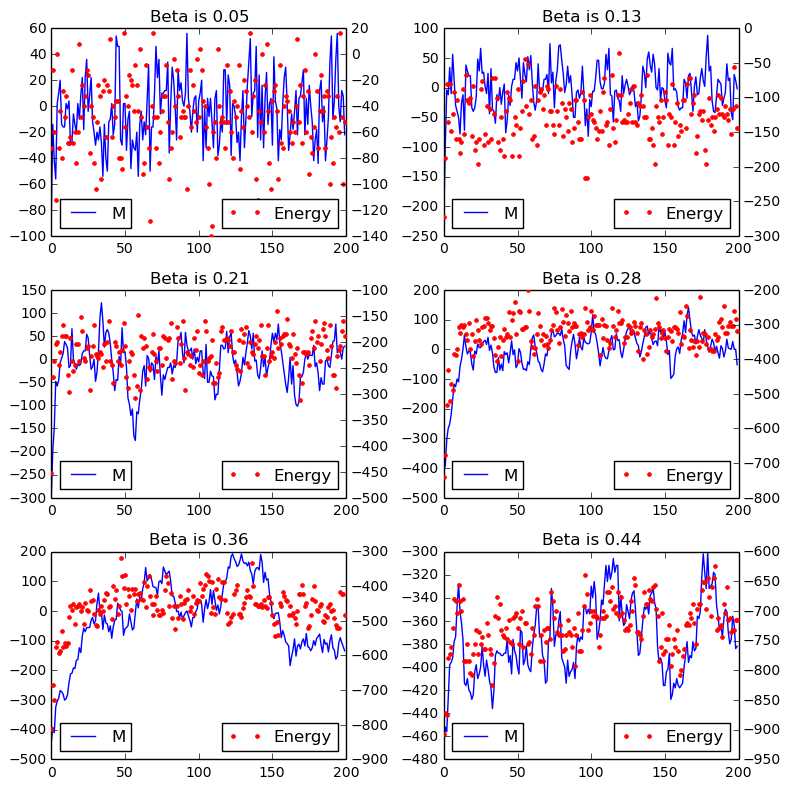

In [14]:
# Ordered configuration 

beta_list = np.linspace(0.05,0.4407,6)
itera=200
fig = plt.figure(figsize=(8, 8), dpi=80)
L=22; N=L*L
neighbors, site_dic, x_y_dic = square_neighbors(L)
for (i,beta) in enumerate(beta_list):
    sp =  fig.add_subplot(3, 2,i+1)
    S_init=[-1]*N # ordered
    S,Energy,M =metropolis(S_init,itera,beta)
    sp.plot(M,label='M')
    sp2 = sp.twinx()
    sp2.plot(Energy,'r.',label='Energy')
    sp.set_title('Beta is %.2f'%beta)
    sp.legend(loc=3)
    sp2.legend(loc=4)
    fig.tight_layout()
plt.show()



As we can see the more we approach $\beta_c$ the more the algorithm became slow. For the high $T$ the system reaches really fast the regime $M=0$, we have a sharply peaked zero-magnetization. As we will see after, for the low $T$ hte magnetization is double-peaked at the two extrem.
But between this values of temperature, around $T_c$, there is a regime where the magnetization distribution is flat. A flipping algorithm has trouble to sample this kind of distribution and that's the reason as we reach $T_c$ we do not converge towards $M=0$, or infinitely slowly.


The following picture will try to explain more precisely this point. We will note that we will change the Metropolis algorithm for this question and only make 1 change for each iteration. The point is to see more specifically the change in magnetization.

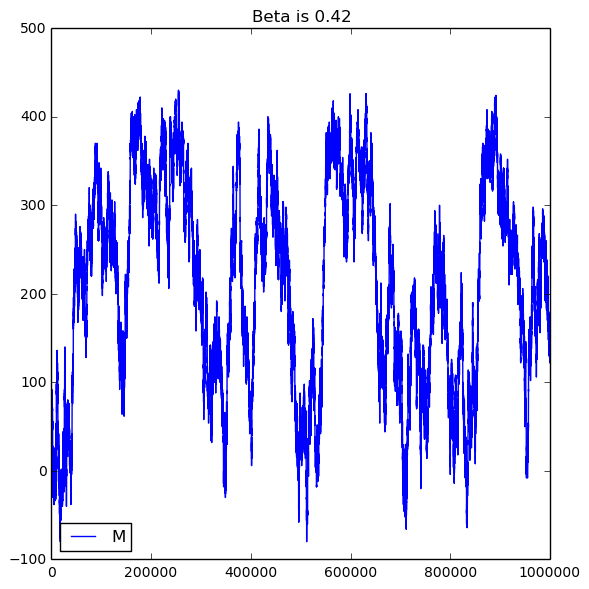

In [15]:
def metropolis_new(S,itera,beta):
  E=[] ; M=[] ; Energy = energy(S,N,neighbors);
  for i_sweep in range(itera):
    
        k = rdm.randint(0,N-1)
        h = sum(S[neighbors[k][j]] for j in range(4))
        Delta_E=2.*h*S[k]
        Upsilon=np.exp(-beta*Delta_E)
        if rand() < Upsilon: 
            Energy = Energy + Delta_E
            S[k] = -S[k]
        E.append(Energy)
        M.append(Mag(S))
  return S,E,M

beta_list = 0.42
itera=1000000
fig = plt.figure(figsize=(6, 6), dpi=80)

sp =  fig.add_subplot(1,1,1)
S_init=init_square_random(22,beta_list)
S,Energy,M =metropolis_new(S_init,itera,beta)
sp.plot(M,label='M')
    #sp2 = sp.twinx()
    #sp2.plot(Energy,'r.',label='Energy')
sp.set_title('Beta is %.2f'%beta)
sp.legend(loc=3)
    #sp2.legend(loc=4)
fig.tight_layout()
plt.show()


This figure represents the magnetization for 1 000 000 iterations on a $22 \times 22$ lattice. It seems that the trajectory of the magnetization goes from $-450$ to $450$ ($\sim$ number of spins) with equal probabilities (roughly). We can then assimilate the Markov chain by a kind of random walk. For such a process, an independent sample will be generated when the distance covered is of the order of the interval. Because we have $\Delta \propto \sqrt{\text{iterations}}$, we find that a new sample will be generated every $\Delta = 484^2$ steps. In this figure we should have something like 4 independents samples.

If we go close to $T_c$, the slowing down can be interpreted as an increase of the correlation length. The spins are constantly changing, but not independently; there are
large domains of parallel spins which persist for long periods of time. Thus, spins far apart from one another are strongly correlated (see next animation). Because we only change the magnetization by a small amount, for a wide distribution (in our first case 900), the algorithm is slowing down.

In [12]:
#Initialisation Graphic
#Beta = 0.3 , T > T_c
#---------------------------------------------
S=init_square_random(32,0.44)

fig = plt.figure(figsize=(7, 7), dpi=80)

pylab.gca().set_xticks([])
pylab.gca().set_yticks([])
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(0, 1), ylim=(0, 1))
title = ax.text(0.02, 1.07, '', transform=ax.transAxes)
energy_text = ax.text(0.3, 1.07, '', transform=ax.transAxes)
mag_text = ax.text(0.7, 1.07, '', transform=ax.transAxes)
plt.title(r'Spins configuration for L=%i, $\beta$=%.3f'%(L,beta))
for i in range(L):
        for j in range(L):
            x, y, dy = (i + 0.5) * s, (j + 0.5) * s, 0.85 * s * S[site_dic[(i, j)]]
            arrow = FancyArrowPatch((x, y - 0.5 * dy), (x, y + 0.5 * dy),
                    color='.2', lw=1, alpha=(.5+S[site_dic[(i, j)]]*0.3), arrowstyle="Simple" +
                    ", head_length=" + str(2 * 150 * s) +
                    ", head_width=" + str(2* 150 * s) +
                    ", tail_width=" + str(2 * 40 * s))
            arrows.append(arrow)

for fleche in arrows:
    ax.add_patch(fleche)

#Anim            
anim =animation.FuncAnimation(fig, animate, 
                               init_func=init_anim, 
                               frames=30, 
                               interval=20,
                               blit=True)

display_animation(anim)

As we can observe, we see regions of parallel spins persisting in times. We still have a gobal magnetization equal to 0 but the spins are not totally independant because they are evolving by area, and this leads to a slowing of the algorithm.

Now we are studying the case of a random initialization for temperature lower than $T_c$.

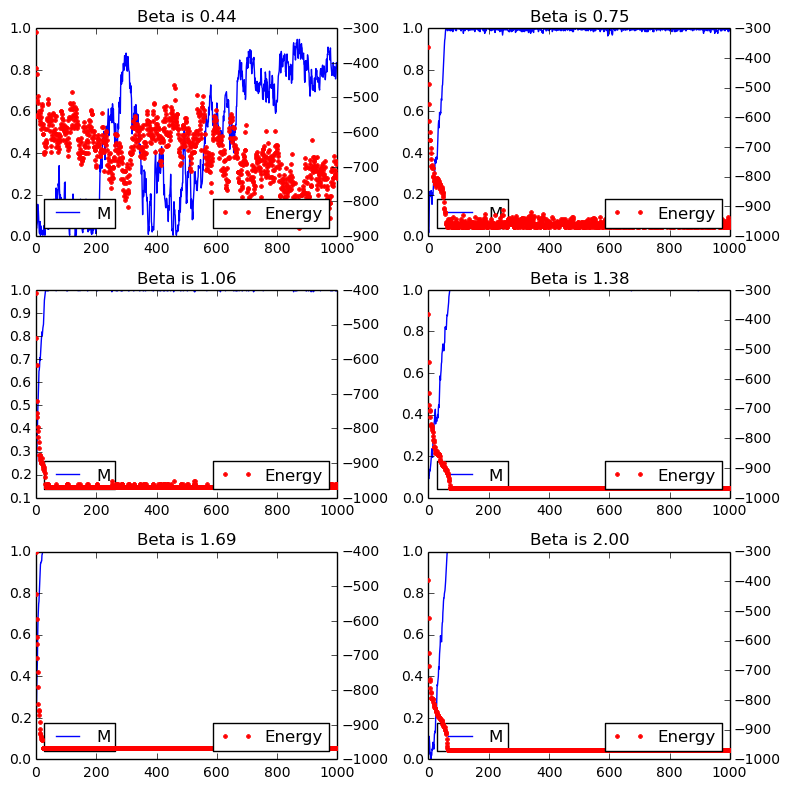

In [17]:
# Random configuration

beta_list = np.linspace(0.4407,2,6)
itera=1000
fig = plt.figure(figsize=(8, 8), dpi=80)

for (i,beta) in enumerate(beta_list):
    sp =  fig.add_subplot(3, 2,i+1)
    S_init=init_square_random(22,beta) # ordered
    S,Energy,M =metropolis(S_init,itera,beta)
    M = [abs(M[i])/(1.0*N) for i in range(len(M))]
    sp.plot(M,label='M')
    sp2 = sp.twinx()
    sp2.plot(Energy,'r.',label='Energy')
    sp.set_title('Beta is %.2f'%beta)
    sp.legend(loc=3)
    sp2.legend(loc=4)
    fig.tight_layout()
plt.show()


The curves above are plots of the magnetization and energy of the system for temperature above the critical one. Near $T_c$ we find the random walk behavior as explain previously. If we increase $\beta$ we can see that the system becomes fully magnetized with a minimal energy. This is in accordance with video of the evolution of the spins.
The time needed to reach the equilibrium is shorter than the one for $T>T_c$, but maybe thisscomes from the fact that we are in random initial configuration and for the previous question we were in ordered system.


If we were at $T=0$ we do not always reach a perfect configuration. Indeed if we are looking at the metropolis algorithm, if we find an initial configuration such that $\Delta E$ is of the sign of the spin, for all spin we will end up with a probability of change equal to $0$. This is unlikely but it comes from the fact that for very slow temperature the change in system are slower. But if we are not in this specific configuration we always reach a perfect configuration.

## Cluster Algorithm

In order to solve the problem of the slowing down at $T_c$, we are now implementing a cluster algorithm instead of a flipping one.

In [45]:
# All the algorithms, we implement the one of part 3 at the same time
def cluster(S_init,L,beta,time):
  global neighbors,site_dic,x_y_dic,S,N_cluster
  S=S_init
  N = L*L
  p=1 - np.exp(-2*beta)
  neighbors,site_dic,x_y_dic=square_neighbors(L)
  for iter in range(time):
   k=rdm.randint(0,N-1)
   Pocket = [k]
   Cluster = [k]
   N_cluster = 1
   while Pocket != []:
      k =rdm.choice(Pocket)
      for l in neighbors[k]:
         if S[l] == S[k] and l not in Cluster and rand() < p:
            N_cluster += 1
            Pocket.append(l)
            Cluster.append(l)
      Pocket.remove(k)
   for k in Cluster:
    S[k] = - S[k]
  return S


def cluster_number(S_init,L,beta,time):
  global neighbors,site_dic,x_y_dic,S,N_cluster
  S=S_init
  N = L*L
  p=1 - np.exp(-2*beta)
  neighbors,site_dic,x_y_dic=square_neighbors(L)
  for iter in range(time):
   k=rdm.randint(0,N-1)
   Pocket = [k]
   Cluster = [k]
   N_cluster = 1
   while Pocket != []:
      k =rdm.choice(Pocket)
      for l in neighbors[k]:
         if S[l] == S[k] and l not in Cluster and rand() < p:
            N_cluster += 1
            Pocket.append(l)
            Cluster.append(l)
      Pocket.remove(k)
   #print (N_cluster)
   for k in Cluster:
    S[k] = - S[k]
  return S
    
def cluster_energy(S_init,L,beta,time):
  global neighbors,site_dic,x_y_dic,S,M,E,M2,M4,temps,temps_tot
  E=[]; M=[]; S=S_init;M2=0; temps = [] ; temps_tot = 0
  N = L*L
  p=1 - np.exp(-2*beta)
  neighbors,site_dic,x_y_dic=square_neighbors(L)
  for iter in range(time):
   k=rdm.randint(0,N-1)
   Pocket = [k]
   Cluster = [k]
   N_cluster = 1
   while Pocket != []:
      k =rdm.choice(Pocket)
      for l in neighbors[k]:
         if S[l] == S[k] and l not in Cluster and rand() < p:
            N_cluster += 1
            Pocket.append(l)
            Cluster.append(l)
      Pocket.remove(k)
   for k in Cluster: 
    S[k] = - S[k]
   temps_tot = temps_tot + N_cluster/(1.0*N)
   temps.append(temps_tot)
   E.append(energy(S,N,neighbors))
   Mnew = (abs(Mag(S)))/(1.0*N)
   M.append(Mnew)
  return S,E,M,temps
 


def cluster_new(S_init,L,beta,time):
  global neighbors,site_dic,x_y_dic,S,M,E,M2,M4
  E=0; M=0; S=S_init;M2=0
  N = L*L
  p=1 - np.exp(-2*beta)
  neighbors,site_dic,x_y_dic=square_neighbors(L)
  for iter in range(time):
   k=rdm.randint(0,N-1)
   Pocket = [k]
   Cluster = [k]
   N_cluster = 1
   while Pocket != []:
      k =rdm.choice(Pocket)
      for l in neighbors[k]:
         if S[l] == S[k] and l not in Cluster and rand() < p:
            N_cluster += 1
            Pocket.append(l)
            Cluster.append(l)
      Pocket.remove(k)
   for k in Cluster: 
    S[k] = - S[k]
   E=E+energy(S,N,neighbors)
   Mnew = (abs(Mag(S)))/(1.0*N)
   M=M+Mnew
   M2 = M2 + Mnew**2
   M4 = M4 + Mnew**4
  return S,E,M,M2,M4




In [47]:
# animation function.  This is called sequentially
def animate_cluster(l):
    global S,beta,arrows,N,L,neighbors,time
    S = cluster_number(S,L,beta,1)
    
    #arrows=[]
    title.set_text('')
    time=time+N_cluster
    Energy=energy(S,N,neighbors)
    magne=Mag(S)
    title.set_text('Time = %i' %time)
    energy_text.set_text('Energy = %.2f'%Energy)
    mag_text.set_text('Magnetization = %1.f'%magne)
    for i in range(L):
        for j in range(L):
            x, y, dy = (i + 0.5) * s, (j + 0.5) * s, 0.85 * s * S[site_dic[(i, j)]]
            arrows[i*L+j].set_positions((x, y - 0.5 * dy), (x, y + 0.5 * dy)) 
            arrows[i*L+j].set_alpha(.5+S[site_dic[(i, j)]]*0.3)
            arrows.append(arrow)
    #p = PatchCollection(arrows,match_original=True)
    return arrows,title,energy_text,mag_text

S=init_square_random(32,0.6)
time=0
fig = plt.figure(figsize=(7, 7), dpi=80)

pylab.gca().set_xticks([])
pylab.gca().set_yticks([])
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(0, 1), ylim=(0, 1))
title = ax.text(0.02, 1.07, '', transform=ax.transAxes)
energy_text = ax.text(0.3, 1.07, '', transform=ax.transAxes)
mag_text = ax.text(0.7, 1.07, '', transform=ax.transAxes)
plt.title(r'Spins configuration, cluster algorithm,  for L=%i, $\beta$=%.3f'%(L,beta))
for i in range(L):
        for j in range(L):
            x, y, dy = (i + 0.5) * s, (j + 0.5) * s, 0.85 * s * S[site_dic[(i, j)]]
            arrow = FancyArrowPatch((x, y - 0.5 * dy), (x, y + 0.5 * dy),
                    color='.2', lw=1, alpha=(.5+S[site_dic[(i, j)]]*0.3), arrowstyle="Simple" +
                    ", head_length=" + str(2 * 150 * s) +
                    ", head_width=" + str(2* 150 * s) +
                    ", tail_width=" + str(2 * 40 * s))
            arrows.append(arrow)

for fleche in arrows:
    ax.add_patch(fleche)

#Anim            
anim =animation.FuncAnimation(fig, animate_cluster, 
                               init_func=init_anim, 
                               frames=40, 
                               interval=20,
                               blit=True)

display_animation(anim)


In [48]:
S=init_square_random(32,0.3)
time=0
fig = plt.figure(figsize=(7, 7), dpi=80)

pylab.gca().set_xticks([])
pylab.gca().set_yticks([])
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(0, 1), ylim=(0, 1))
title = ax.text(0.02, 1.07, '', transform=ax.transAxes)
energy_text = ax.text(0.3, 1.07, '', transform=ax.transAxes)
mag_text = ax.text(0.7, 1.07, '', transform=ax.transAxes)
plt.title(r'Spins configuration, cluster algorithm,  for L=%i, $\beta$=%.3f'%(L,beta))
for i in range(L):
        for j in range(L):
            x, y, dy = (i + 0.5) * s, (j + 0.5) * s, 0.85 * s * S[site_dic[(i, j)]]
            arrow = FancyArrowPatch((x, y - 0.5 * dy), (x, y + 0.5 * dy),
                    color='.2', lw=1, alpha=(.5+S[site_dic[(i, j)]]*0.3), arrowstyle="Simple" +
                    ", head_length=" + str(2 * 150 * s) +
                    ", head_width=" + str(2* 150 * s) +
                    ", tail_width=" + str(2 * 40 * s))
            arrows.append(arrow)

for fleche in arrows:
    ax.add_patch(fleche)

#Anim            
anim =animation.FuncAnimation(fig, animate_cluster, 
                               init_func=init_anim, 
                               frames=40, 
                               interval=20,
                               blit=True)

display_animation(anim)

As we can observe on the animations the equilibirum states of the system are the same, we two different phases. However the convergence is really faster and we seem to reach the equilibirum in a few steps : we see some big cluster which are change totally. 
Tje system seems to be always changing between spins up and down but because we have a symmetry with respect to this modification, and the magnetization is always positiv it doesn't bother the results.

We reproduce the several begavior of the part one with this algorithm. In order to compare the time needed to equilibrate the system, we will remind that in the local algorithm, at each step we are doing $N$ iterations. To compare with the cluster algorithm we will need to find the mean size of a cluster to be able to reach to some conclusions, or like we do we change the time steps and divide it by the step in the local algorithm.

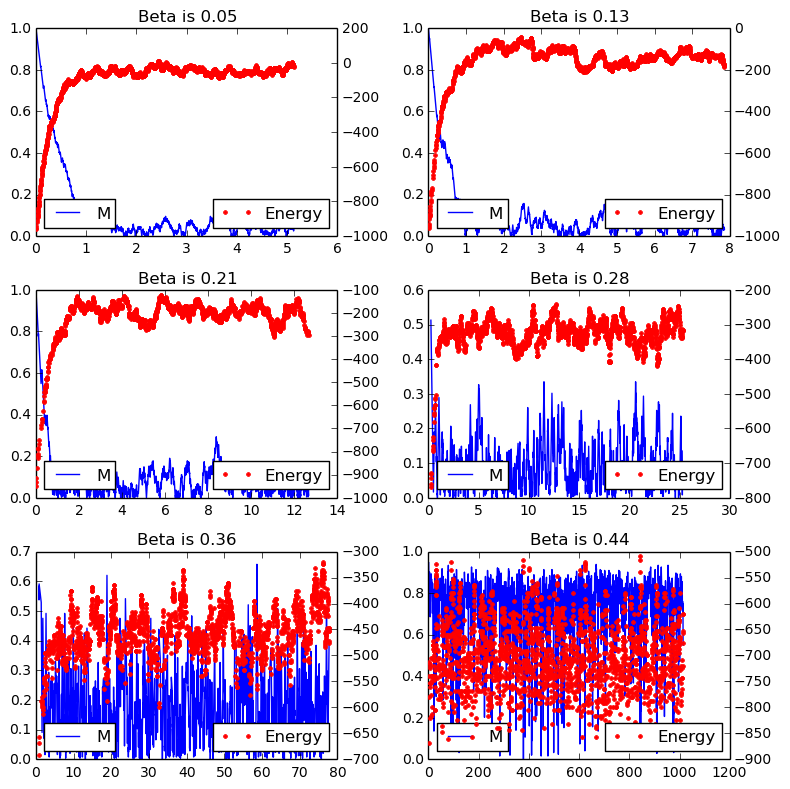

In [19]:
# Ordered configuration 

beta_list = np.linspace(0.05,0.4407,6)
itera=2000
fig = plt.figure(figsize=(8, 8), dpi=80)
L=22; N=L*L
for (i,beta) in enumerate(beta_list):
    sp =  fig.add_subplot(3, 2,i+1)
    S_init=[-1]*N # ordered
    S,Energy,M,temps =cluster_energy(S_init,L,beta,itera)
    sp.plot(temps,M,label='M')
    sp2 = sp.twinx()
    sp2.plot(temps,Energy,'r.',label='Energy')
    sp.set_title('Beta is %.2f'%beta)
    sp.legend(loc=3)
    sp2.legend(loc=4)
    fig.tight_layout()
plt.show()

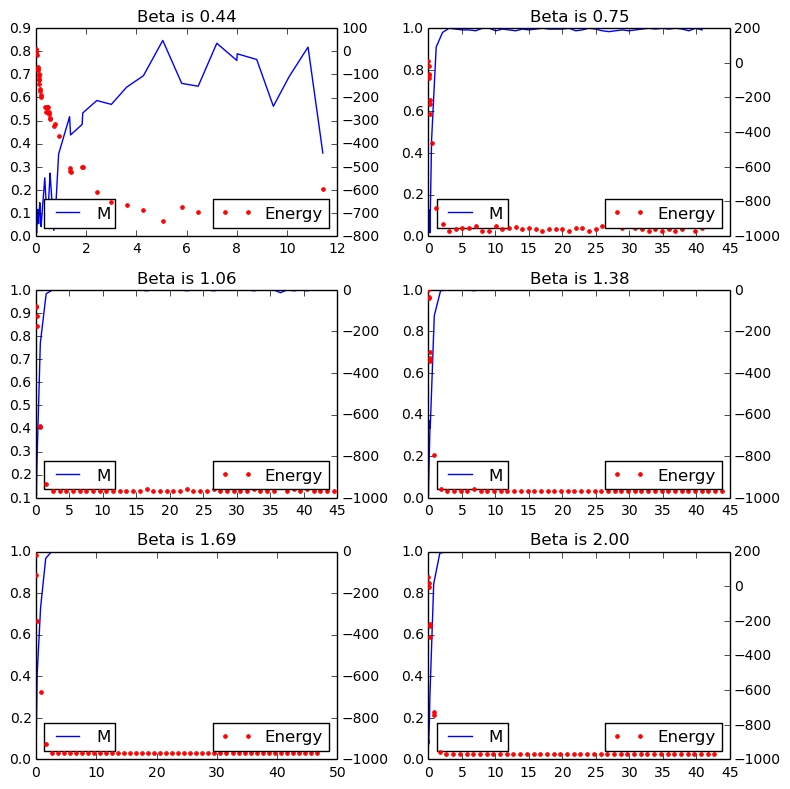

In [20]:
beta_list = np.linspace(0.4407,2,6)
itera=50
fig = plt.figure(figsize=(8, 8), dpi=80)
L=22; N=L*L
for (i,beta) in enumerate(beta_list):
    sp =  fig.add_subplot(3, 2,i+1)
    S_init=init_square_random(22,beta) # random
    S,Energy,M,temps =cluster_energy(S_init,L,beta,itera)
    sp.plot(temps,M,label='M')
    sp2 = sp.twinx()
    sp2.plot(temps,Energy,'r.',label='Energy')
    sp.set_title('Beta is %.2f'%beta)
    sp.legend(loc=3)
    sp2.legend(loc=4)
    fig.tight_layout()
plt.show()

As we can see the results are globally the same with the cluster algorithm. Howewer the time needed for convergence of the system is from far shorter than the one for metropolis algorithm.

This can be explain by the fact that when we change spins, we chnage a cluster which globally change the energy. Thus the energy reachs faster her equilibrium state and the system too by analogy. In the metropolis algorithm, the step size of the energy comes only from one spin, so it's lower than the mean step size of the clusters.

We can add that we nerver change spins we do not impact in hte good way the configuration. In the metropolis algorithm this could happen.

## Finite size scaling

Now we want to estimate some quantties to highlights the phase transition

------------------------------------------------------------
                  Value of L=16
------------------------------------------------------------


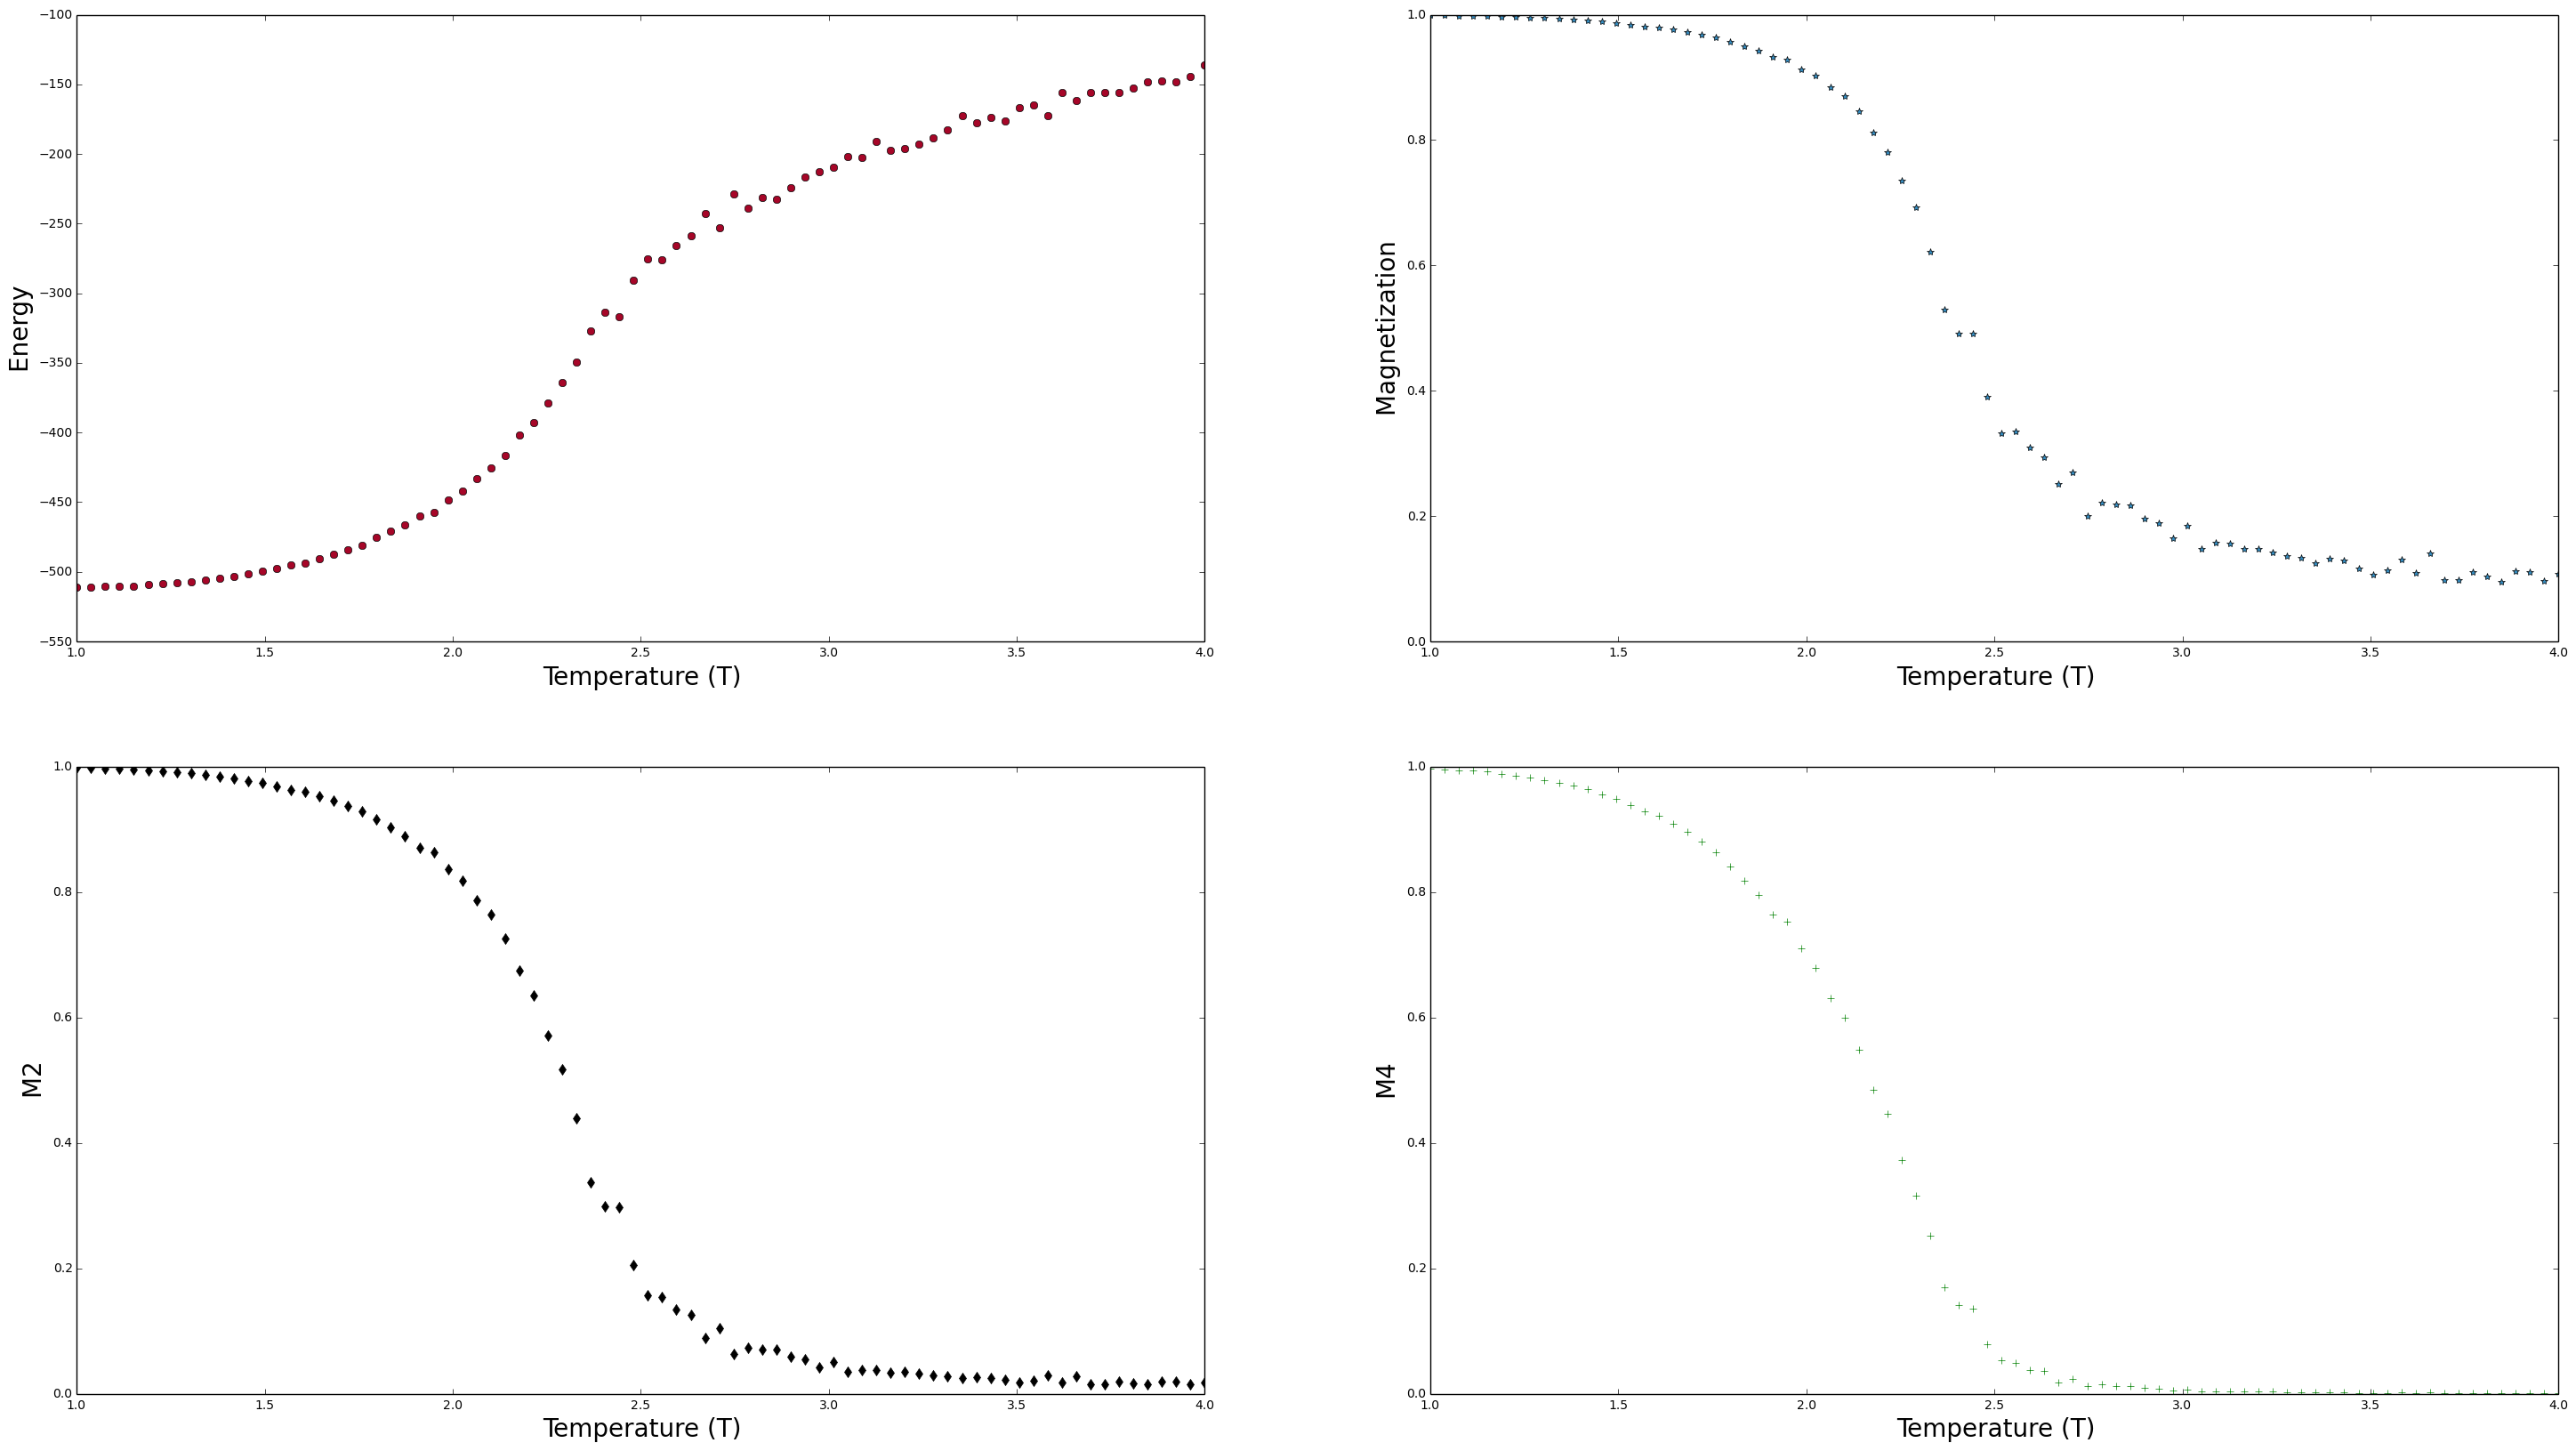

------------------------------------------------------------
------------------------------------------------------------


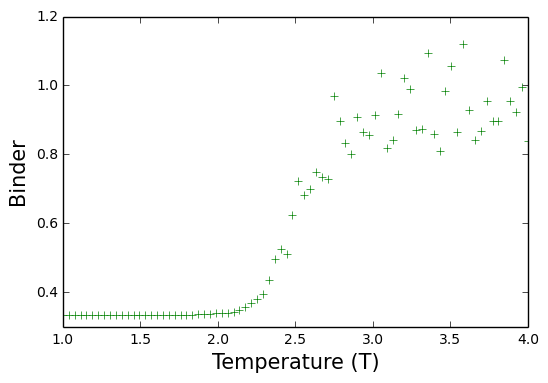

In [21]:
#beta= 0.05
temp_length = 80

Energy = np.zeros(temp_length)
Magnetization = np.zeros(temp_length)
T  = np.linspace(1, 4, temp_length)        #temperature
L=16 # small beginning of L
N = L*L
M_list=np.zeros(temp_length);E_list=np.zeros(temp_length)
M2_list=np.zeros(temp_length) ; M4_list=np.zeros(temp_length)

for i,temp in enumerate(T):
    E=0;M = 0;S=[];M2=0;M4=0
    #S_init=[rdm.choice([-1,1]) for k in range(N)]
    S_init=[1]*N # ordered
    equi_steps = 1000
    S=cluster(S_init,L,1.0/temp,equi_steps)
    
    monte_carlo_steps = 1000 # explain why use of monte carlo
    S,E,M,M2,M4=cluster_new(S,L,1.0/temp,monte_carlo_steps)
    M_list[i]=M/monte_carlo_steps
    E_list[i]=E/monte_carlo_steps
    M2_list[i]=M2/monte_carlo_steps
    M4_list[i]=M4/monte_carlo_steps
# plot the energy and Magnetization
print ('------------------------------------------------------------')
print ('                  Value of L=%i'%L)
print ('------------------------------------------------------------')
f = plt.figure(figsize=(36, 20), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, E_list, 'o', color="#A60628", label=' Energy');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, M_list, '*', color="#348ABD", label='Magnetization');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, M2_list, 'd', color="black", label='M2');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("M2 ", fontsize=20);


sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, M4_list, '+', color="green", label='M4');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("M4", fontsize=20);
plt.show()
from __future__ import division # floating point division in Py2x

plt.plot(T, M4_list/(3*(M2_list**2)), '+', color="green", label='binder');
plt.xlabel("Temperature (T)", fontsize=15);
plt.ylabel("Binder", fontsize=15);
print ('------------------------------------------------------------')
print ('------------------------------------------------------------')





------------------------------------------------------------
                  Value of L=32
------------------------------------------------------------


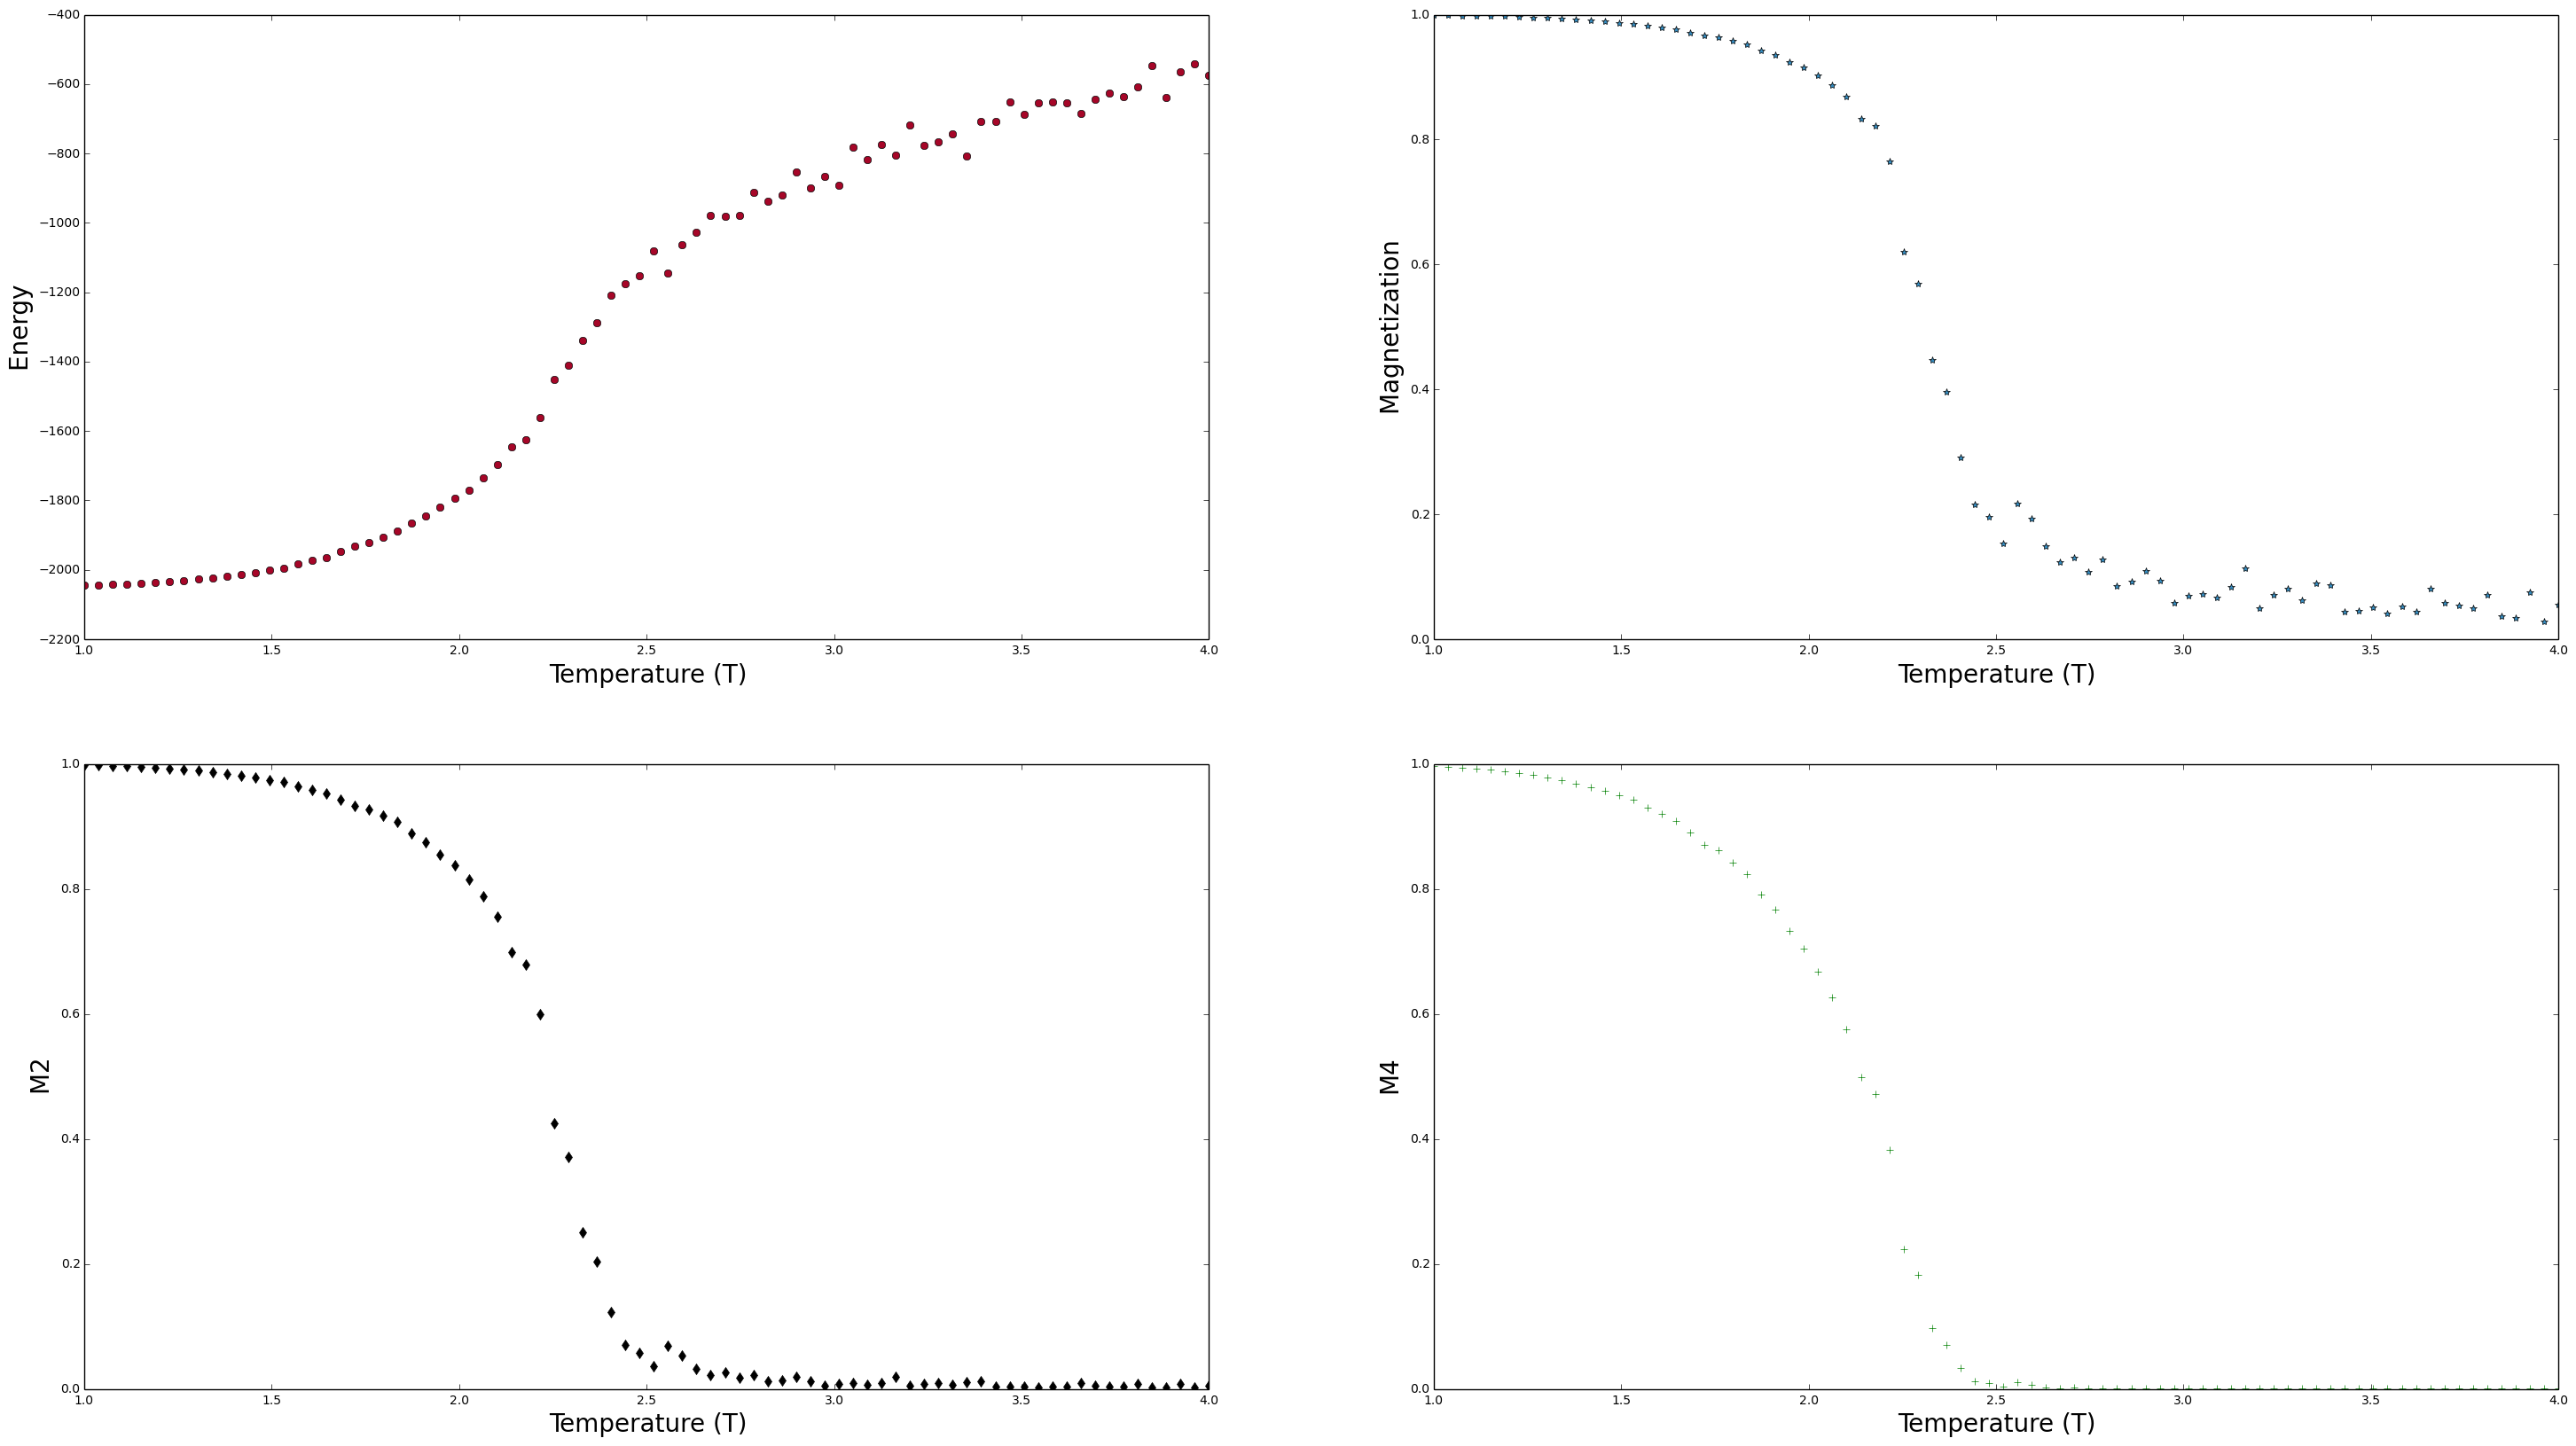

------------------------------------------------------------
------------------------------------------------------------


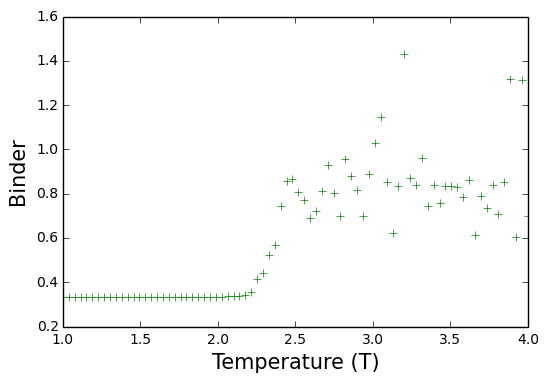

In [22]:

temp_length = 80

Energy = np.zeros(temp_length)
Magnetization = np.zeros(temp_length)
T  = np.linspace(1, 4, temp_length)        #temperature
L=32 # small beginning of L
N = L*L
M_list=np.zeros(temp_length);E_list=np.zeros(temp_length)
M2_list=np.zeros(temp_length) ; M4_list=np.zeros(temp_length)

for i,temp in enumerate(T):
    E=0;M = 0;S=[];M2=0;M4=0
    #S_init=[rdm.choice([-1,1]) for k in range(N)]
    S_init=[1]*N # ordered
    equi_steps = 800
    S=cluster(S_init,L,1.0/temp,equi_steps)
    
    monte_carlo_steps = 300 # explain why use of monte carlo
    S,E,M,M2,M4=cluster_new(S,L,1.0/temp,monte_carlo_steps)
    M_list[i]=M/monte_carlo_steps
    E_list[i]=E/monte_carlo_steps
    M2_list[i]=M2/monte_carlo_steps
    M4_list[i]=M4/monte_carlo_steps
# plot the energy and Magnetization
print ('------------------------------------------------------------')
print ('                  Value of L=%i'%L)
print ('------------------------------------------------------------')
f = plt.figure(figsize=(36, 20), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, E_list, 'o', color="#A60628", label=' Energy');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, M_list, '*', color="#348ABD", label='Magnetization');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, M2_list, 'd', color="black", label='M2');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("M2 ", fontsize=20);


sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, M4_list, '+', color="green", label='M4');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("M4", fontsize=20);
plt.show()
from __future__ import division # floating point division in Py2x

plt.plot(T, M4_list/(3*(M2_list**2)), '+', color="green", label='binder');
plt.xlabel("Temperature (T)", fontsize=15);
plt.ylabel("Binder", fontsize=15);
print ('------------------------------------------------------------')
print ('------------------------------------------------------------')


------------------------------------------------------------
                  Value of L=64
------------------------------------------------------------


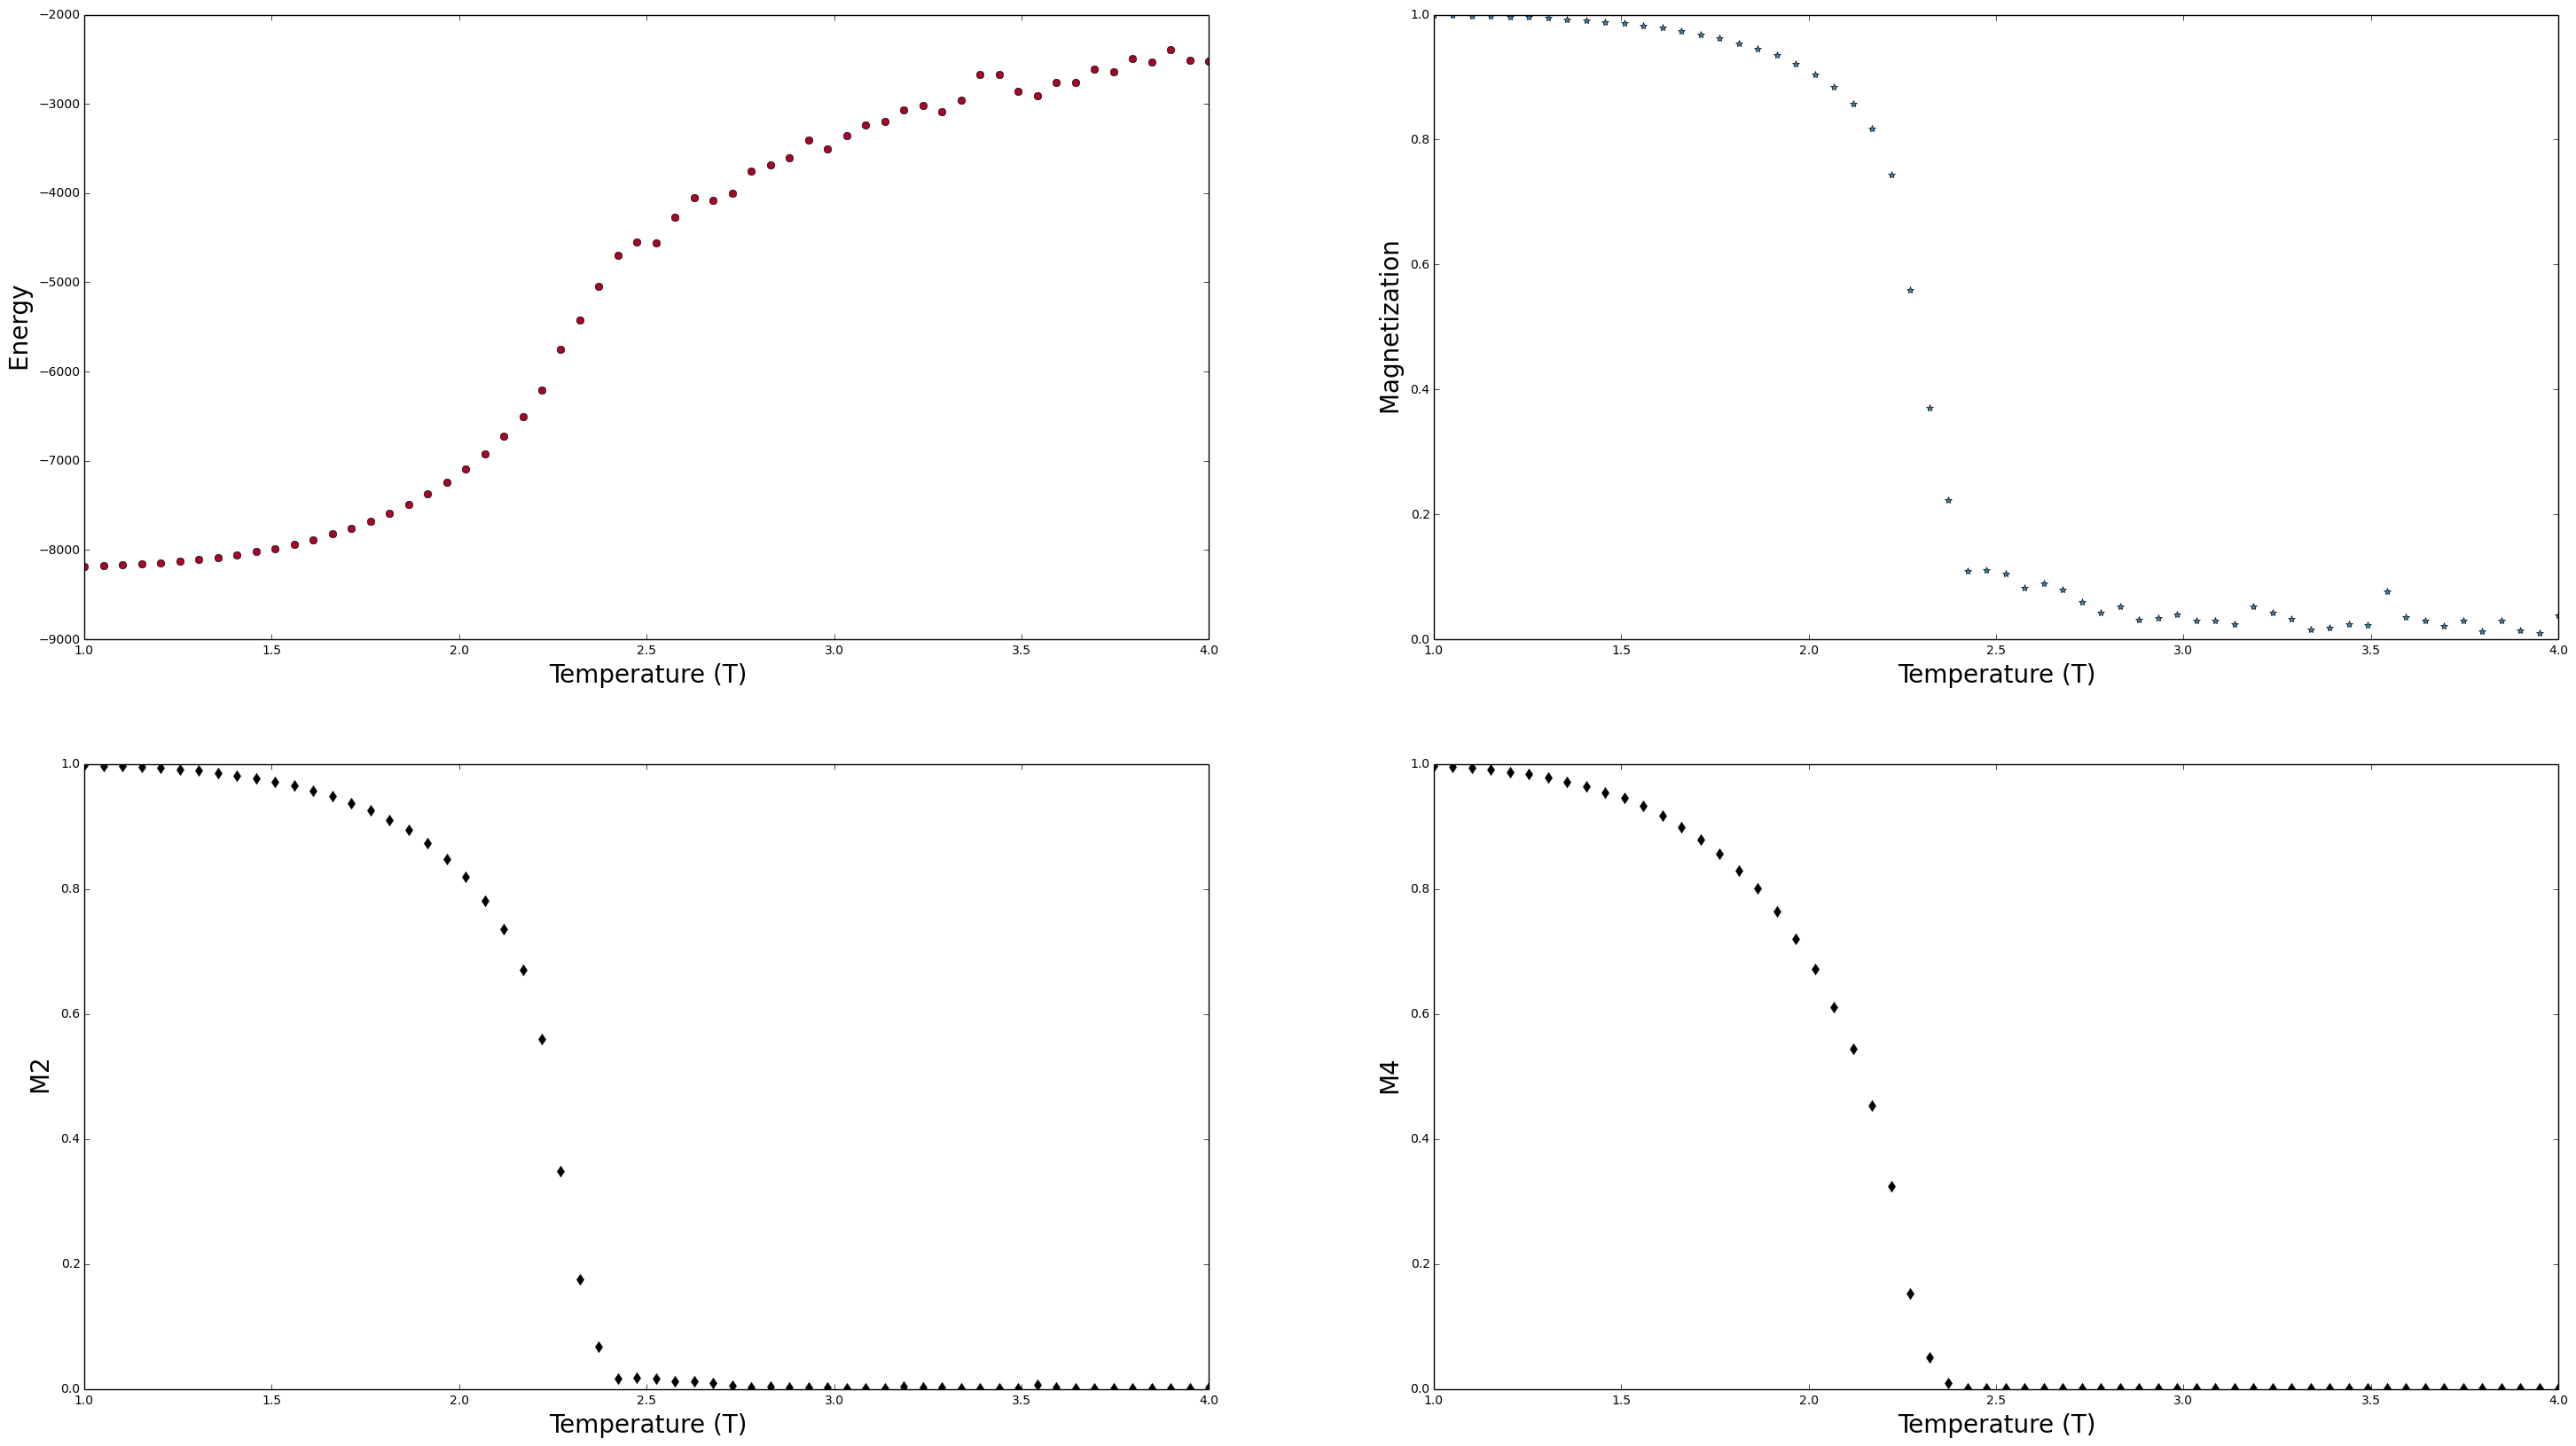

------------------------------------------------------------
------------------------------------------------------------


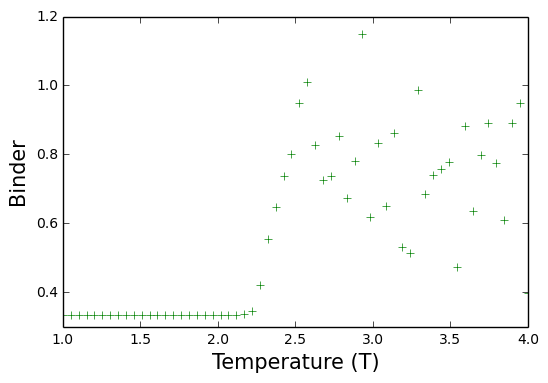

In [23]:
temp_length = 60

Energy = np.zeros(temp_length)
Magnetization = np.zeros(temp_length)
T  = np.linspace(1, 4, temp_length)        #temperature
L=64 # small beginning of L
N = L*L
M_list=np.zeros(temp_length);E_list=np.zeros(temp_length)
M2_list=np.zeros(temp_length) ; M4_list=np.zeros(temp_length)

for i,temp in enumerate(T):
    E=0;M = 0;S=[];M2=0;M4=0
    #S_init=[rdm.choice([-1,1]) for k in range(N)]
    S_init=[1]*N # ordered
    equi_steps = 1000
    S=cluster(S_init,L,1.0/temp,equi_steps)
    
    monte_carlo_steps = 300 # explain why use of monte carlo
    S,E,M,M2,M4=cluster_new(S,L,1.0/temp,monte_carlo_steps)
    M_list[i]=M/monte_carlo_steps
    E_list[i]=E/monte_carlo_steps
    M2_list[i]=M2/monte_carlo_steps
    M4_list[i]=M4/monte_carlo_steps
# plot the energy and Magnetization
print ('------------------------------------------------------------')
print ('                  Value of L=%i'%L)
print ('------------------------------------------------------------')
f = plt.figure(figsize=(36, 20), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, E_list, 'o', color="#A60628", label=' Energy');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, M_list, '*', color="#348ABD", label='Magnetization');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, M2_list, 'd', color="black", label='M2');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("M2 ", fontsize=20);


sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, M4_list, 'd', color="black", label='M4');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("M4", fontsize=20);
plt.show()
from __future__ import division # floating point division in Py2x

plt.plot(T, M4_list/(3*(M2_list**2)), '+', color="green", label='binder');
plt.xlabel("Temperature (T)", fontsize=15);
plt.ylabel("Binder", fontsize=15);
print ('------------------------------------------------------------')
print ('------------------------------------------------------------')


This figures shows the behavior of some estimate for different size of lattice. We have tried to reach equilibrium state each time but the computations time has lead to some trouble, especially in the cse of large lattice.

However we are able to find a global behavior. The curves have all the same behavior before the critical temperature. The influence of the size of the lattice can be seen near the critical temperature and after. Indeed for large lattice, the transition is sharper and we are closer to a magnetization equal to $0$.


Now we want to compare with the Onsager solution our solution for large lattice $L=64$. 

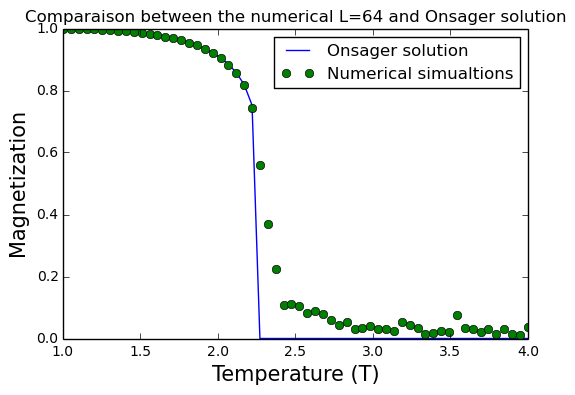

In [24]:

onsager = np.zeros(len(T))
i=0
temp = T[0]
while temp<2.269:
    onsager[i] = (1-np.sinh(2/temp)**(-4))**(1/8.0)
    i=i+1
    temp = T[i]
plt.plot(T,onsager,label='Onsager solution')
plt.plot(T,M_list,'o',label='Numerical simualtions')
plt.legend()
plt.title('Comparaison between the numerical L=64 and Onsager solution')
plt.xlabel("Temperature (T)", fontsize=15);
plt.ylabel("Magnetization", fontsize=15);

As we can observe, the fit by the Onsager solution is pretty acurate before the phase transition. After $T_c$ it doesn't really fit the datas. This seems logic because the transition can not happen in finite size system. Hence to find the Dirac behavior we should increase the size $L$ but we will never be able to obtain exactly the Onsager solution. This onclusion is analog as the one with the influence of the size of lattice on the general behavior.



We will now try to obtain the values of the exponents, and $T_c$ numerically. For such a task, we will use the Binder cumulant and some scaling assumptions. The first idea is that, looking at the form of the scaling assumptions, at $T=T_c$ the Binder cumulant does not depend on $L$. Hence we should obtain a global crossing point if we plot the several binder cumulant.

Indeed we have the following values for the Binder Cumulant :

$$g_{Binder} = \begin{cases} \frac{1}{3} & \text{if $T<T_c$} \\ g & \text{at $T_c$} \\ 1 & \text{for $T>T_c$} \end{cases}$$

With $g$ an universal value, which does not depend on $L$. To find $T_c$ the idea will be the following :
We plot the binder cumulant with respect to the temperature for several $L$. Hence the critical temperature will be the intersection point of all the curves.
Because we now the area of the transition, we will zoom on this area to have faster computations. For huge lattice, the time of computation is too big to have general behavior in limited time.

In [3]:
def cluster_part3(S_init,L,beta,time):
  global neighbors,site_dic,x_y_dic,S,M,M2,M4
  M=0; S=S_init;M2=0
  N = L*L
  p=1 - np.exp(-2*beta)
  neighbors,site_dic,x_y_dic=square_neighbors(L)
  Mnew = Mag(S)/(1.0*N)
  for iter in range(time):
   k=rdm.randint(0,N-1)
   Pocket = [k]
   Cluster = [k]
   N_cluster = 1
   while Pocket != []:
      k =rdm.choice(Pocket)
      for l in neighbors[k]:
         if S[l] == S[k] and l not in Cluster and rand() < p:
            N_cluster += 1
            Pocket.append(l)
            Cluster.append(l)
      Pocket.remove(k)
   for k in Cluster: 
    S[k] = - S[k]
   #E=E+energy(S,N,neighbors)
   Mnew = Mnew + 2*S[Cluster[0]]*len(Cluster)/(1.0*N)
   M=M+abs(Mnew)
   M2 = M2 + Mnew**2
   M4 = M4 + Mnew**4
  return S,M,M2,M4


In [84]:
import pickle 
L_list = [8,16,32,64]
temp_length=30
T  = np.linspace(2.22, 2.28, temp_length)        #temperature

M_list=np.zeros((len(L_list),temp_length));E_list=np.zeros((len(L_list),temp_length))
M2_list=np.zeros((len(L_list),temp_length)) ; M4_list=np.zeros((len(L_list),temp_length))
for (i,L) in enumerate(L_list):
    with open('donnees2L%iT30'%L,'rb') as fichier :
        mondepickler = pickle.Unpickler(fichier)
               
        
        M_list[i]=mondepickler.load()
        M2_list[i]=mondepickler.load()
        M4_list[i]=mondepickler.load()
        T=mondepickler.load()
        fichier.close()


In [86]:
T


array([ 2.22      ,  2.22206897,  2.22413793,  2.2262069 ,  2.22827586,
        2.23034483,  2.23241379,  2.23448276,  2.23655172,  2.23862069,
        2.24068966,  2.24275862,  2.24482759,  2.24689655,  2.24896552,
        2.25103448,  2.25310345,  2.25517241,  2.25724138,  2.25931034,
        2.26137931,  2.26344828,  2.26551724,  2.26758621,  2.26965517,
        2.27172414,  2.2737931 ,  2.27586207,  2.27793103,  2.28      ])

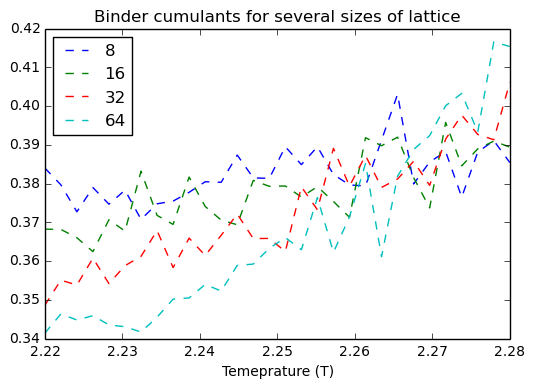

In [85]:
for i in range(len(L_list)):
    plt.plot(T,M4_list[i]/(3*(M2_list[i]**2)),'--',label=L_list[i])
    #if i< len(L_list)-1:
        #idx = np.argwhere(np.diff(np.sign(M4_list[i]/(3*(M2_list[i]**2))- M4_list[i+1]/(3*(M2_list[i+1]**2)))) != 0).reshape(-1) + 0
        #plt.plot(T[idx], M4_list[i,idx]/(3*(M2_list[i,idx]**2)), 'ro')
plt.title('Binder cumulants for several sizes of lattice')
plt.xlabel('Temeprature (T)')
plt.legend(loc=2)

We find $T_c = 2.27$, or more likely a area of transition between 2.26 and 2.27. This method is not really precise here because we have a whole area of intersections because of the fluctuations. To have better results we should compute the binder cumulants for larger steps in the cluster algorithm in order to reach a more equilibrated system and be able to compute a mean on a larger sample.
However we still find the good area for the phase transition, and we can notice that the slope of the binder cumulants increase with the size of lattice. This is in accordance with the fact that at infinite size we should have a dirac fonction at $T_c$ and then an infinite slope.


Now that we have $T_c$ for our simulation we can look at the other exponants. To find this ones we will plot the magnetization with respect to $L$ at $T_c$. Indeed at $T_c$ we find directly a scaling low of $L$ for the magnetization with the assumptions of finite size scaling.
Because of the large time of computations, we have only a few values of £l$ to do the fit in order to find the exponents but we will try to see the results however.

[ 1.          0.42952265  3.64686553]
Beta = 0.117779
Nu = 1


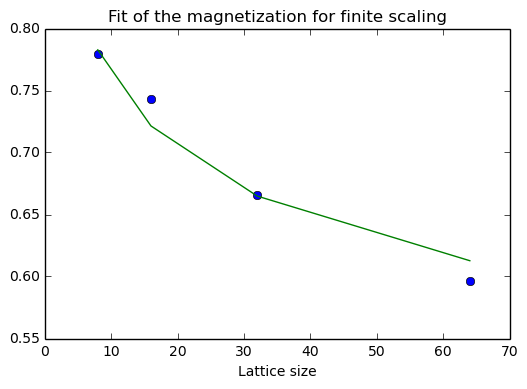

In [100]:
from scipy.optimize import curve_fit

def func(x,a,b,nu):
        return x**(-b/nu)
M_TC = np.zeros(len(L_list))
M_TC[:] =abs(M_list[:,24])
popt, pcov = curve_fit(func, L_list, M_TC)
print popt
#print np.sqrt(np.diag(pcov))
plt.plot(L_list,M_TC,'o')
fitplot = np.zeros(len(L_list))
fitplot[:] = func(L_list[:],popt[0],popt[1]/popt[2],1)
plt.plot(L_list,fitplot)
print ('Beta = %f'%(popt[1]/popt[2]))
print ('Nu = 1')
plt.xlabel('Lattice size')
plt.title('Fit of the magnetization for finite scaling')

We don't have many vales to fit but the values of exponents we find are close to the one of Onsager. Indeed we find :
$$ \nu = 1$$
$$ \beta = 0.117$$
We should have found $\beta = 0.125$. With all the fluctuations in the system, and the fact that the computations are not totally at equilibirum this seems to be an honest result and highlights the fact that with faster computer this method will be working really good.